In [ ]:
#Feature Selection

# https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/downloads/predicting-a-pulsar-star.zip/1

In [ ]:
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
https://ga.greyatom.com/fs/learn/programs/10515ac7-c1a1-441f-bec1-2f3f0714f6df/concepts/ce3d336c-3080-486f-863c-5b98de69416c/topics/cf9a9b2a-0d67-48df-abdd-d8d4f3ae55c0

In [ ]:
# Correlation Coefficent

# It makes intuitive sense to choose features that are highly correlated to the target variable.
# The more correlated the features are to the target, easier it is for machine to predict it

# Selecting features having correlation coefficents above a certain threshold will result in the model performing better.

# Additionally one can also filter out redundant features by not selecting certain features that are already strongly correlated
# with other features.



In [ ]:
# For eg: If x1 and x2 have strong correlation to the target variable but they are also strongly correlated to each other. In that case, a ML model including both x1 and x2 will give almost the same results compared to the ML models where either only x1 or x2 was included in the dataset.

# There are different methods to calculate the correlation factor, however, Pearson’s correlation coefficient is most widely used.

# The Pearson coefficient is a measure of the strength of association between two continuous variables.

# It has already been covered in Descriptive Statistics.

# Still, let's refresh,

# Pearson's correlation coefficient is calculated by the formula:

# corr = \frac{cov \ (x,y)}{\sigma_x\sigma_y}
# corr= 
# σ 
# x
# ​	
#  σ 
# y
# ​	
 
# cov (x,y)
# ​	
 

# Where,

# cov(x,y):covariance between x and y,

# \sigma_xσ 
# x
# ​	
#  : standard deviation of x,

# \sigma_yσ 
# y
# ​	
#  : standard deviation of y

# By taking x as our target variable and y as each of the features, we can easily find how much they are correlated to each other.

# Setting up a threshold after that(for eg: correlation coefficent >0.5 ), we can identify strongly related features and drop the others.



In [1]:
import pandas as pd
df=pd.DataFrame({'A':[1,2,3,4,5],'B':[2,2,6,6,6],'C':[4,4,6,10,10],'D':[1,1,1,1,5]})


In [2]:
print(df)

   A  B   C  D
0  1  2   4  1
1  2  2   4  1
2  3  6   6  1
3  4  6  10  1
4  5  6  10  5


In [3]:
df_corr=df.corr()

In [4]:
df_corr

,A,B,C,D
A,1.000000,0.866025,0.938315,0.707107
B,0.866025,1.000000,0.842701,0.408248
C,0.938315,0.842701,1.000000,0.589768
D,0.707107,0.408248,0.589768,1.000000


In [7]:
df_corr_D=df_corr[df_corr['D']>0.5]

In [8]:
#Correlation matrix
df_corr_D

,A,B,C,D
A,1.000000,0.866025,0.938315,0.707107
C,0.938315,0.842701,1.000000,0.589768
D,0.707107,0.408248,0.589768,1.000000


In [9]:
print(df_corr_D.index.values)


['A' 'C' 'D']


In [ ]:
# Whats correlation and covariance and their appln?

# https://www.youtube.com/watch?v=qtaqvPAeEJY

In [ ]:
# Correlation

# https://www.youtube.com/watch?v=xZ_z8KWkhXE

In [ ]:
# A and D have two same values.

# C and D have similar pattern distribution for two values[1 maps to 4]



In [10]:
import seaborn as sns

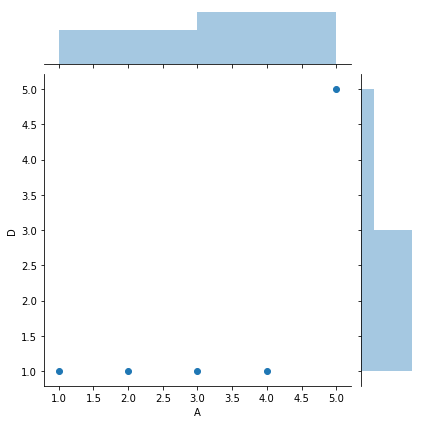

In [16]:
sns.jointplot(x=df['A'],y=df['D'])


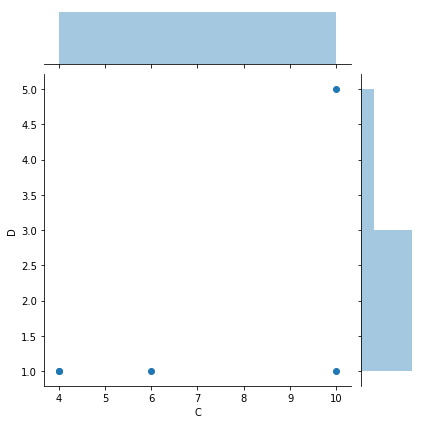

In [18]:
sns.jointplot(x=df['C'],y=df['D'])


In [ ]:
#lets take a random data and select features on basis of correlatn matrix

In [19]:
df.cov()
#jus a check

,A,B,C,D
A,2.5,3.0,4.5,2.0
B,3.0,4.8,5.6,1.6
C,4.5,5.6,9.2,3.2
D,2.0,1.6,3.2,3.2


In [20]:
import os

In [24]:
os.getcwd()

'C:\\Users\\91808'

In [26]:
os.chdir(r"C:\Users\91808\Desktop\Data science\Feature Selection")

In [91]:
data=pd.read_csv("pulsar_stars.csv")

In [92]:
data.shape

(17898, 9)

In [109]:
corr=data.corr()
corr=corr['target_class']
corr

 Mean of the integrated profile                 -0.673181
 Standard deviation of the integrated profile   -0.363708
 Excess kurtosis of the integrated profile       0.791591
 Skewness of the integrated profile              0.709528
 Mean of the DM-SNR curve                        0.400876
 Standard deviation of the DM-SNR curve          0.491535
 Excess kurtosis of the DM-SNR curve            -0.390816
 Skewness of the DM-SNR curve                   -0.259117
target_class                                     1.000000
Name: target_class, dtype: float64

In [110]:
corr_columns=corr[abs(corr)>0.5]

In [111]:
corr_columns

 Mean of the integrated profile              -0.673181
 Excess kurtosis of the integrated profile    0.791591
 Skewness of the integrated profile           0.709528
target_class                                  1.000000
Name: target_class, dtype: float64

In [112]:
#only above 3 columns had correlatn nearer to 1(positive or negative)

In [113]:
# corr_columns.drop(['target_class'],inplace=True,axis=0)

In [114]:
corr_columns

 Mean of the integrated profile              -0.673181
 Excess kurtosis of the integrated profile    0.791591
 Skewness of the integrated profile           0.709528
target_class                                  1.000000
Name: target_class, dtype: float64

In [115]:
a=corr_columns.index.values
a

array([' Mean of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', 'target_class'],
      dtype=object)

In [117]:
p=data[a]
    

In [166]:
#running model without feature selction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


wif=pd.read_csv("pulsar_stars.csv")
target=wif['target_class']
wif.drop(['target_class'],inplace=True,axis=1)
X_train,X_test,y_train,y_test=train_test_split(wif,target,test_size=0.3,random_state=0)


model=LinearRegression()
model.fit(X_train,y_train)
score=model.score(X_test,y_test)
score

0.6641407888582541

In [167]:
#with feature selection
y=p['target_class']
x=p.drop(['target_class'],axis=1)
X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=0)
model=LinearRegression()
model.fit(X_train1,y_train1)
score=model.score(X_test1,y_test1)
score

0.6424135987857387

In [ ]:
# #Chi square test

# #understand concept of chi square from below video"
# # https://www.khanacademy.org/math/statistics-probability/inference-categorical-data-chi-square-tests/chi-square-goodness-of-fit-tests/v/pearson-s-chi-square-test-goodness-of-fit
# #https://www.khanacademy.org/math/ap-statistics/chi-square-tests/chi-square-tests-two-way-tables/v/chi-square-test-association-independence


#Chi square only works on natural nos; no fractions; percentage etc
z

# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/

In [133]:
dis=pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,2,6,6,6], 'C':[4,4,4,2,10], 'D':[1,1,1,1,5]})


In [134]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [153]:
test=SelectKBest(score_func=chi2,k=2)

In [154]:
data_chi= test.fit(dis.iloc[:,:3], dis.iloc[:,3]) 

#data_chi=test.fit_transform(df.iloc[:,:4],df.iloc[:,4])

In [155]:
data_chi

SelectKBest(k=2, score_func=<function chi2 at 0x0000025647F5D488>)

In [156]:
#thus as pr chi as well, A and C are the ones which are most correlated to D

In [157]:
# SelectKBest
# Parameters:
# score_func : callable
# Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores. Default is f_classif (see below “See also”). The default function only works with classification tasks.

# k : int or “all”, optional, default=10
# Number of top features to select. The “all” option bypasses selection, for use in a parameter search.

    
# Attributes:
# scores_ : array-like, shape=(n_features,)
# Scores of features.

# pvalues_ : array-like, shape=(n_features,)
# p-values of feature scores, None if score_func returned only scores.



In [158]:
data_chi.scores_
#gives the score obtained


array([1.66666667, 0.72727273, 7.04166667])

In [159]:
data_chi.pvalues_

#p-values helps to reject/accept the hypothesis of chi-square

array([0.1967056 , 0.39376863, 0.00796349])

In [160]:
print("selected index:",data_chi.get_support(True))


selected index: [0 2]


In [148]:
data_chi.get_params

<bound method BaseEstimator.get_params of SelectKBest(k=1, score_func=<function chi2 at 0x0000025647F5D488>)>

In [149]:
data_chi.get_support

<bound method SelectorMixin.get_support of SelectKBest(k=1, score_func=<function chi2 at 0x0000025647F5D488>)>

In [150]:
test.fit_transform(dis.iloc[:,:3], dis.iloc[:,3])

array([[ 4],
       [ 4],
       [ 4],
       [ 2],
       [10]], dtype=int64)

In [161]:
dis

,A,B,C,D
0,1,2,4,1
1,2,2,4,1
2,3,6,4,1
3,4,6,2,1
4,5,6,10,5


In [162]:
data_chi= test.fit_transform(data.iloc[:,:3], data.iloc[:,3]) 


In [163]:
data_chi #data tranformed to only 2 imp features

array([[ 1,  4],
       [ 2,  4],
       [ 3,  4],
       [ 4,  2],
       [ 5, 10]], dtype=int64)

In [ ]:
#With chi square selection

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [168]:
model=SelectKBest(score_func=chi2,k=3)

In [170]:
chi=pd.read_csv("pulsar_stars.csv")
X=chi.drop(['target_class'],1)
y=chi['target_class']

In [172]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,random_state=0,test_size=0.3)

In [176]:
#for chi square your data should be non negative; model cannot run!!!!!! it has -ve data(skewness)

In [ ]:
#https://pypi.org/project/dataframe-column-identifier/

#https://www.wildcardconsulting.dk/never-do-this-mistake-when-using-feature-selection/


# https://stats.stackexchange.com/questions/204141/difference-between-selecting-features-based-on-f-regression-and-based-on-r2

In [ ]:
#ANOVA

In [ ]:
# Theory and formula :

# # https://ga.greyatom.com/fs/learn/programs/10515ac7-c1a1-441f-bec1-2f3f0714f6df/concepts/ce3d336c-3080-486f-863c-5b98de69416c/topics/1492f4f4-7b2d-4fec-a4c3-ea0b4a8448ad

In [ ]:
# The means of A and B are more separated(with respect to a feature x_i)

# The variances of A and B are small(with respect to a feature x_i)

# The F-score captures these two properties, such that a high F-score reflects a small overlap.

# Definition

# F-score is defined as the following:

# Variance between the samples(of a feature and target variable)/ Variance within the samples

# # Similar to the above example, ANOVA table tells the proportion of variance explained by the features with respect to the 
# # target variable

# # Obviously the features that explain the largest proportion of the variance should be retained.

# # It has two python implementations in the form of f_classif and f_regression

# # Since in our Ames Dataset problem we are dealing with a regression problem, 
# # we will learn how to implement f_regression score from sklearn library.

# # It's implementation is very similar to the implementation of 'chi-square' score



In [186]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,f_classif

In [189]:
test=SelectKBest(score_func=f_regression,k=2)

In [188]:
test.fit_transform(data.iloc[:,:3], data.iloc[:,3])

array([[ 1,  4],
       [ 2,  4],
       [ 3,  4],
       [ 4,  2],
       [ 5, 10]], dtype=int64)

In [ ]:
#Wrapper method

#https://ga.greyatom.com/fs/learn/programs/10515ac7-c1a1-441f-bec1-2f3f0714f6df/concepts/ce3d336c-3080-486f-863c-5b98de69416c/topics/4a5caa54-5f85-417e-ac34-c8bf625d99c2

In [ ]:
# Following are the wrapper methods:

# Forward Selection
# Backward Selection
# RFE


In [ ]:
# Forward selection is an iterative technique in which we begin with having no features in the model. 
# In every cycle, we continue including features which best enhances our model till an adding of another variable
# does not enhance the performance of the model. Consider the following python code:



In [ ]:
# In backward selection, we do the opposite of forward selection. 
# We start with all the features and remove the least significant feature after each iteration which 
# improves the performance of the model. We continue this until no improvement is observed on removal of features. 



In [ ]:
# Though effective in certain cases, these two methods(Forward and Backward) can provide problems when 
# dealing with especially large or highly-dimensional datasets. Though not popularly used,
# you can implement the same using mlxtend library


In [ ]:
# Recursive Feature Elimination:
# RFE method involves repeatedly constructing a specific model and selecting the most impactful (or least impactful feature), 
# setting that feature aside and then repeating the process with the rest of the features. This process is iterated until all 
# features in the dataset are used up(or other stopping criteria are satisfied). Features are then ranked according to when they
# were eliminated. In this way, RFE is able to work out the best subset of features that will enhance the performance of the
# model.



In [ ]:
# Its interesting to note that RFE isn't selecting features which have the max correlation with target variable. 
# It's also inherently identifying correlation between features as well.
# RFE will always provide the most optimised features and almost always results in good performance,
# but it has major drawback. This whole process of going back and forth with the features is a very time consuming process.
# For datasets with large feature space(which is almost always in any ML problem), this method is not a good choice.



In [ ]:
#Lets study Embedded along with linear and logistic Regression

,A,B,C,D
0,1,2,4,1
1,2,2,4,1
2,3,6,6,1
3,4,6,10,1
4,5,6,10,5


,A,B,C,D
A,True,True,True,True
B,True,True,True,False
C,True,True,True,True
D,True,False,True,True


,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
